# Workshop: Informática Aplicada
## Machine Learning y Data Science: un enfoque práctico
Rafaela - 5 y 6 de junio

Ariel Rossanigo - Mariano Ferrero

# Caso práctico: prediciendo impagos

**"El crédito o contrato de crédito es una operación financiera en la que una persona (el acreedor) realiza un préstamo por una cantidad determinada de dinero a otra persona (el deudor) y en la que este último, se compromete a devolver la cantidad solicitada (además del pago de los intereses devengados, seguros y costos asociados si los hubiere) en el tiempo o plazo definido de acuerdo a las condiciones establecidas para dicho préstamo."** 

Wikipedia, 2019.

### En este caso se trata de créditos hipotecarios.

## Accediendo a los datos

In [1]:
import numpy as np
seed = 30000
np.random.seed(30000)
import pandas as pd
pd.options.display.max_columns = 999
%matplotlib inline

In [2]:
df_defaults = pd.read_csv('data/defaults_data.csv.zip')

In [3]:
df_defaults.shape

(307511, 122)

In [4]:
df_defaults.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
columnas = ['TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR', 'CNT_CHILDREN', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE']

## Glosario de términos

- TARGET: Variable a predecir, para cada fila indica si el tomador de la deuda tendrá problemas para realizar el pago (1) o no (0).
- CODE_GENDER: Indica el sexo del solicitante. M para masculino y F para femenino.
- FLAG_OWN_CAR: Indica si el solicitante tiene un auto a su nombre.
- CNT_CHILDREN: Número total de hijos.
- NAME_EDUCATION_TYPE: Especifica el nivel de educación máximo del solicitante.
- NAME_FAMILY_STATUS: Condición civil.
- NAME_HOUSING_TYPE: Indica el tipo de vivienda que ocupa actualmente.
- DAYS_BIRTH: Edad (en días).
- DAYS_EMPLOYED: Cantidad de días en el último empleo.
- CNT_FAM_MEMBERS: Cantidad de integrantes en el grupo familiar.
- AMT_ANNUITY: Valor a pagar mensualmente por el crédito.
- AMT_INCOME_TOTAL: Ingresos anuales totales del solicitante.
- AMT_CREDIT: Importe del crédito solicitado.
- AMT_GOODS_PRICE: Valor total del inmueble solicitado.

In [6]:
df_defaults[columnas].head(5)

,TARGET,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE
0,1,M,N,0,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,1.0,24700.5,202500.0,406597.5,351000.0
1,0,F,N,0,Higher education,Married,House / apartment,-16765,-1188,2.0,35698.5,270000.0,1293502.5,1129500.0
2,0,M,Y,0,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,1.0,6750.0,67500.0,135000.0,135000.0
3,0,F,N,0,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,2.0,29686.5,135000.0,312682.5,297000.0
4,0,M,N,0,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,1.0,21865.5,121500.0,513000.0,513000.0


# Distribución de la variable objetivo

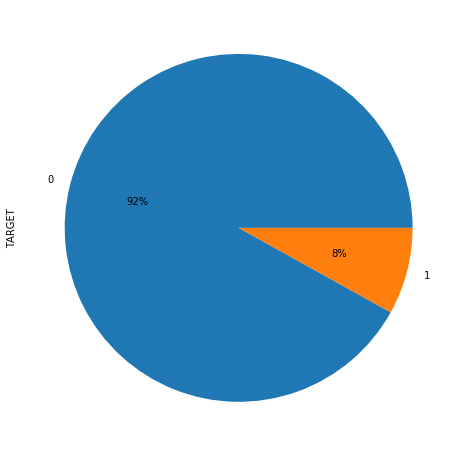

In [7]:
df_defaults.TARGET.value_counts().plot.pie(autopct='%1.0f%%', figsize=(8,8))

In [8]:
df_defaults[columnas].describe()

,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE
count,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307499.000000,3.075110e+05,3.075110e+05,3.072330e+05
mean,0.080729,0.417052,-16036.995067,63815.045904,2.152665,27108.573909,1.687979e+05,5.990260e+05,5.383962e+05
std,0.272419,0.722121,4363.988632,141275.766519,0.910682,14493.737315,2.371231e+05,4.024908e+05,3.694465e+05
min,0.000000,0.000000,-25229.000000,-17912.000000,1.000000,1615.500000,2.565000e+04,4.500000e+04,4.050000e+04
25%,0.000000,0.000000,-19682.000000,-2760.000000,2.000000,16524.000000,1.125000e+05,2.700000e+05,2.385000e+05
50%,0.000000,0.000000,-15750.000000,-1213.000000,2.000000,24903.000000,1.471500e+05,5.135310e+05,4.500000e+05
75%,0.000000,1.000000,-12413.000000,-289.000000,3.000000,34596.000000,2.025000e+05,8.086500e+05,6.795000e+05
max,1.000000,19.000000,-7489.000000,365243.000000,20.000000,258025.500000,1.170000e+08,4.050000e+06,4.050000e+06


## Valores nulos?

In [9]:
df_defaults[columnas].isnull().sum(axis=0)

TARGET                   0
CODE_GENDER              0
FLAG_OWN_CAR             0
CNT_CHILDREN             0
NAME_EDUCATION_TYPE      0
NAME_FAMILY_STATUS       0
NAME_HOUSING_TYPE        0
DAYS_BIRTH               0
DAYS_EMPLOYED            0
CNT_FAM_MEMBERS          2
AMT_ANNUITY             12
AMT_INCOME_TOTAL         0
AMT_CREDIT               0
AMT_GOODS_PRICE        278
dtype: int64

In [10]:
df_defaults[columnas] = df_defaults[columnas].fillna(0)

## Separando datos en train y test

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train, test = train_test_split(df_defaults[columnas], test_size=0.3, random_state=seed)
input_columns = [c for c in columnas if c != 'TARGET']
X_train, X_test = train[input_columns].values, test[input_columns].values
y_train, y_test = train['TARGET'].values, test['TARGET'].values

## Primer experimento: regresión logística

In [13]:
# MANOS A LA OBRA

In [14]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='liblinear')
#clf.fit(X_train, y_train)

## Transformando datos

In [15]:
df_defaults[columnas].dtypes

TARGET                   int64
CODE_GENDER             object
FLAG_OWN_CAR            object
CNT_CHILDREN             int64
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
CNT_FAM_MEMBERS        float64
AMT_ANNUITY            float64
AMT_INCOME_TOTAL       float64
AMT_CREDIT             float64
AMT_GOODS_PRICE        float64
dtype: object

### CODE_GENDER

In [16]:
df_defaults.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [17]:
df_defaults['CODE_GENDER'] = df_defaults.CODE_GENDER == 'F'

### FLAG_OWN_CAR

In [18]:
df_defaults.FLAG_OWN_CAR.value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [19]:
df_defaults['FLAG_OWN_CAR'] = df_defaults.FLAG_OWN_CAR == 'F'

### NAME_FAMILY_STATUS 

In [20]:
df_ = pd.get_dummies(df_defaults.NAME_FAMILY_STATUS, sparse=False)
for c in df_.columns:
    new_column_name = 'NAME_FAMILY_STATUS_' + c
    df_defaults[new_column_name] = df_[c]
    columnas.append(new_column_name)

In [21]:
df_defaults.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

### NAME_EDUCATION_TYPE

In [22]:
df_defaults.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [23]:
from sklearn.preprocessing import OneHotEncoder

In [24]:
df_ = pd.get_dummies(df_defaults.NAME_EDUCATION_TYPE, sparse=False)
for c in df_.columns:
    new_column_name = 'NAME_EDUCATION_TYPE_' + c
    df_defaults[new_column_name] = df_[c]
    columnas.append(new_column_name)

### NAME_HOUSING_TYPE

In [25]:
df_defaults.NAME_HOUSING_TYPE.value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [26]:
df_ = pd.get_dummies(df_defaults.NAME_HOUSING_TYPE, sparse=False)
for c in df_.columns:
    new_column_name = 'NAME_HOUSING_TYPE_' + c
    df_defaults[new_column_name] = df_[c]
    columnas.append(new_column_name)

# Probamos con las nuevas features 

In [27]:
columnas = [c for c in columnas if c not in ['NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS']]

In [28]:
train, test = train_test_split(df_defaults[columnas], test_size=0.3)
input_columns = [c for c in columnas if c != 'TARGET']
X_train, X_test = train[input_columns].values, test[input_columns].values
y_train, y_test = train['TARGET'].values, test['TARGET'].values

In [29]:
clf = LogisticRegression(solver='liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
y_pred = clf.predict(X_test)

# Medimos resultados

In [31]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9200359875994537

In [32]:
# PODEMOS MEDIR USANDO OTRA MÉTRICA? TIENE SENTIDO?

In [33]:
from src import tools
from sklearn.metrics import confusion_matrix

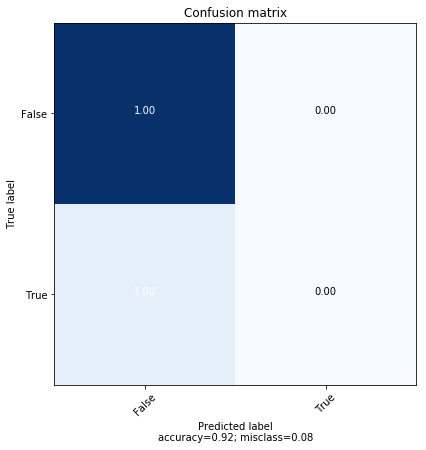

In [34]:
tools.plot_confusion_matrix(confusion_matrix(y_test, y_pred), target_names=['False', 'True'])

In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.0
0.0
0.0


# Segundo experimento: más modelos

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

### Algunos consejos

En los notebooks podemos ver la ayuda de una clase ejecutando el nombre de la clase seguido de ?. Ejemplo:

DecisionTreeClassifier?

# EQUIPO GANADOR!: mayor valor de f1_score sobre y_test

In [37]:
# A TRABAJAR !